<a href="https://colab.research.google.com/github/MWANIKID/PhD-Research-files/blob/main/Random_Walk_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload BOTH: Bitcoin_data.csv and Tesla_stock.csv

Saving Tesla_stock.csv to Tesla_stock.csv
Saving Bitcoin_data.csv to Bitcoin_data.csv


In [ ]:
!pip install pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your BTC and Tesla CSVs here
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"])
tsla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"])

btc.set_index("Date", inplace=True)
tsla.set_index("Date", inplace=True)

# Define LSTM training function
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def lstm_forecast(df, label="BTC"):
    close = df["Close"].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(close)
    X, y = create_sequences(scaled)

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(64, input_shape=(X.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
    r2 = r2_score(y_test_inv, y_pred_inv)

    return {
        "label": label,
        "RMSE": round(rmse, 2),
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "MAPE": f"{mape:.2f}%",
        "R2": round(r2, 2)
    }

# Run forecasts
btc_result = lstm_forecast(btc, "Bitcoin")
tsla_result = lstm_forecast(tsla, "Tesla")

results = pd.DataFrame([btc_result, tsla_result])
print(results)


<ipython-input-3-4e373ed7bfd8>:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
     label     RMSE         MSE      MAE   MAPE    R2
0  Bitcoin  1641.46  2694388.00  1057.80  2.09%  0.99
1    Tesla    11.51      132.42     8.55  3.66%  0.96


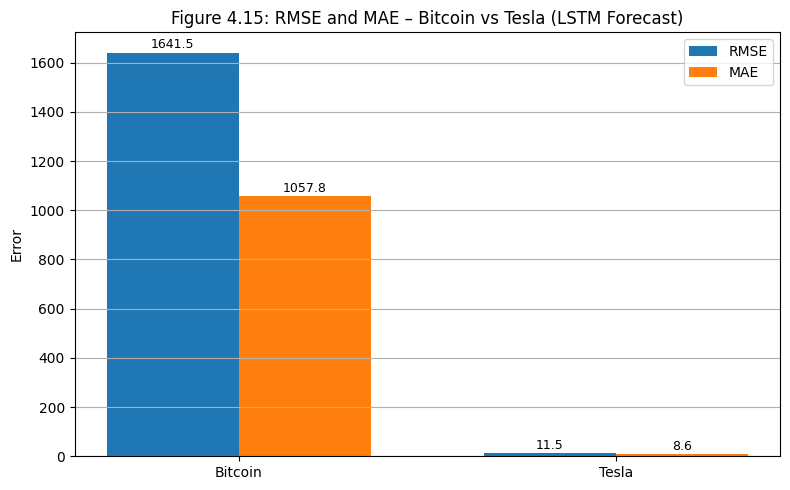

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use your actual results
labels = ['Bitcoin', 'Tesla']
rmse = [btc_result['RMSE'], tsla_result['RMSE']]
mae = [btc_result['MAE'], tsla_result['MAE']]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, rmse, width, label='RMSE')
bars2 = ax.bar(x + width/2, mae, width, label='MAE')

ax.set_ylabel('Error')
ax.set_title('Figure 4.15: RMSE and MAE – Bitcoin vs Tesla (LSTM Forecast)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y')

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("Figure_4.15_RMSE_MAE_BTC_vs_TESLA.png", dpi=300)
plt.show()


In [ ]:
results.to_csv("Table_4.5_LSTM_BTC_TESLA_Evaluation.csv", index=False)
from google.colab import files
files.download("Table_4.5_LSTM_BTC_TESLA_Evaluation.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

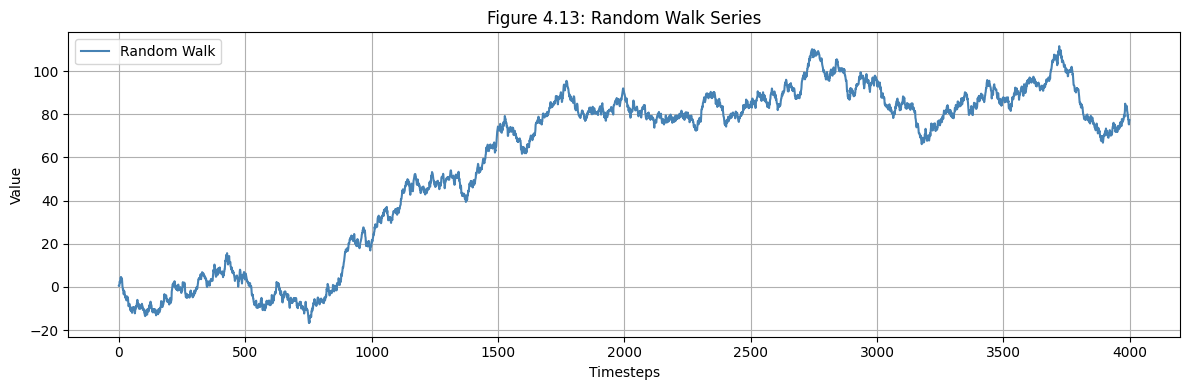

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


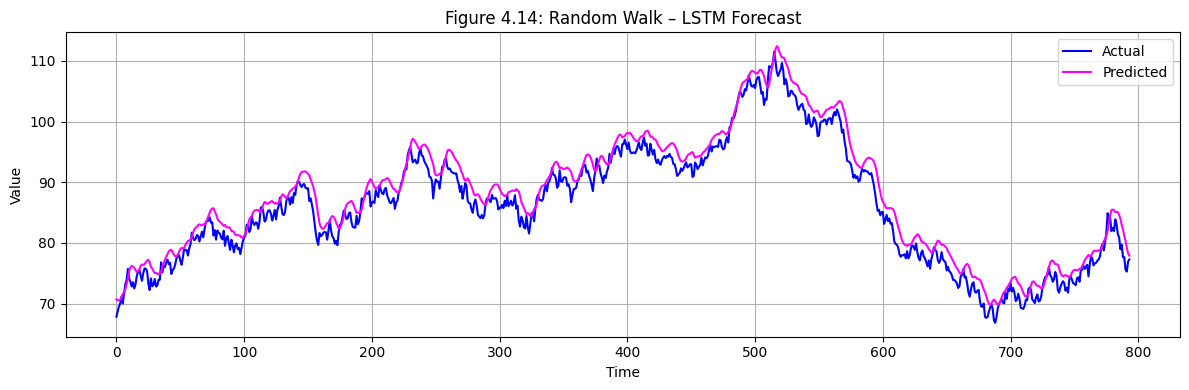

📊 Random Walk Metrics:
RMSE: 2.35
MSE: 5.52
MAE: 2.00
MAPE: 2.36%
R²: 0.94
--------------------------------------------------


<ipython-input-40-f8e9037219ce>:84: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


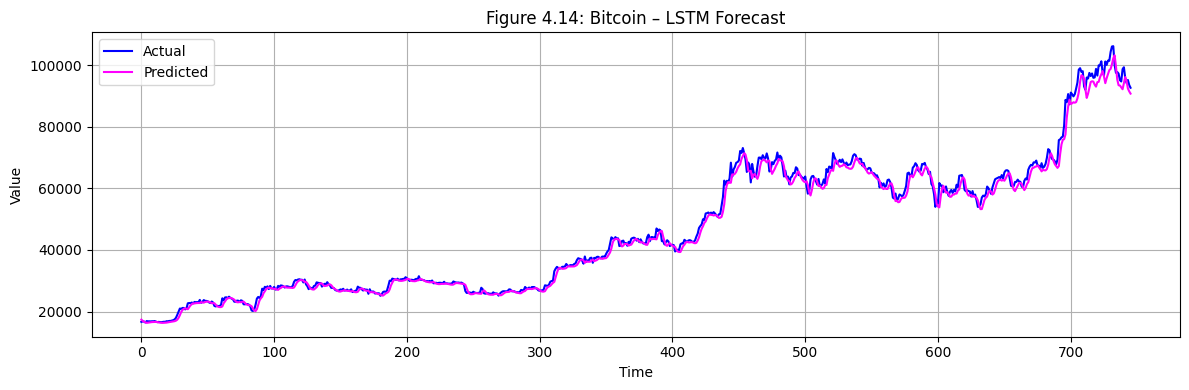

📊 Bitcoin Metrics:
RMSE: 1882.27
MSE: 3542953.73
MAE: 1264.49
MAPE: 2.51%
R²: 0.99
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


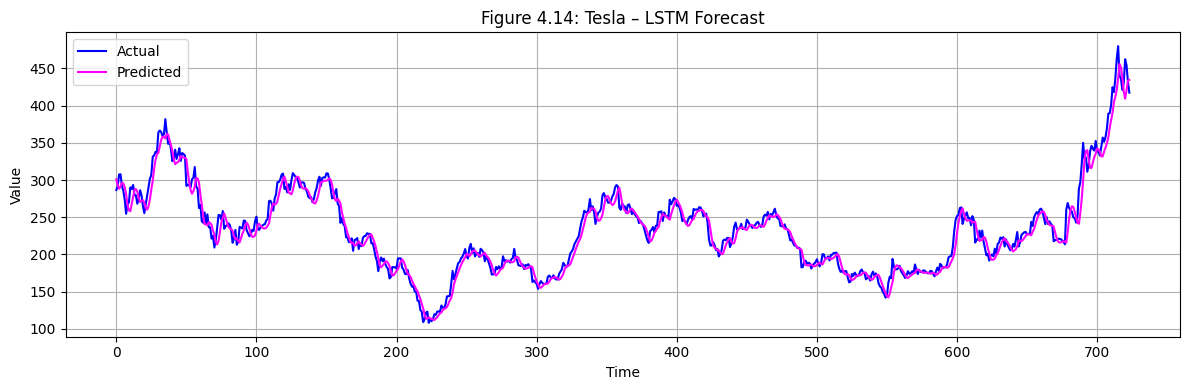

📊 Tesla Metrics:
RMSE: 12.04
MSE: 145.04
MAE: 8.88
MAPE: 3.75%
R²: 0.96
--------------------------------------------------


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1️⃣ Random Walk Generation & Plot
np.random.seed(42)
n_steps = 4000
steps = np.random.normal(loc=0, scale=1, size=n_steps)
random_walk = np.cumsum(steps)

plt.figure(figsize=(12, 4))
plt.plot(random_walk, label="Random Walk", color='steelblue')
plt.title("Figure 4.13: Random Walk Series")
plt.xlabel("Timesteps")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Figure_4.13_Random_Walk.png", dpi=300)
plt.show()

# 2️⃣ Universal Sequence Builder
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# 3️⃣ Universal LSTM Trainer & Plotter
def train_lstm_and_plot(series, label="Random Walk"):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.reshape(-1, 1))
    X, y = create_sequences(scaled, 30)

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([LSTM(64, input_shape=(X.shape[1], 1)), Dense(1)])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv, label="Actual", color='blue')
    plt.plot(y_pred_inv, label="Predicted", color='magenta')
    plt.title(f"Figure 4.14: {label} – LSTM Forecast")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figure_4.14_{label.replace(' ', '_')}_Prediction.png", dpi=300)
    plt.show()

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / np.maximum(np.abs(y_test_inv), 1e-10))) * 100
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"📊 {label} Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.2f}")
    print("-" * 50)

# 4️⃣ Run LSTM for Random Walk
train_lstm_and_plot(random_walk, label="Random Walk")

# 5️⃣ Load BTC and Tesla
btc = pd.read_csv("Bitcoin_data.csv", parse_dates=["Date"])
tesla = pd.read_csv("Tesla_stock.csv", parse_dates=["Date"])
btc.set_index("Date", inplace=True)
tesla.set_index("Date", inplace=True)

# 6️⃣ Run for Bitcoin & Tesla (Close price only)
train_lstm_and_plot(btc["Close"].values, label="Bitcoin")
train_lstm_and_plot(tesla["Close"].values, label="Tesla")


In [41]:
# 📦 Modified function to return metrics
def train_lstm_and_get_metrics(series, label="Random Walk"):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.reshape(-1, 1))
    X, y = create_sequences(scaled, 30)

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([LSTM(64, input_shape=(X.shape[1], 1)), Dense(1)])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Save figure
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv, label="Actual", color='blue')
    plt.plot(y_pred_inv, label="Predicted", color='magenta')
    plt.title(f"Figure 4.14: {label} – LSTM Forecast")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"Figure_4.14_{label.replace(' ', '_')}_Prediction.png", dpi=300)
    plt.close()

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv) / np.maximum(np.abs(y_test_inv), 1e-10))) * 100
    r2 = r2_score(y_test_inv, y_pred_inv)

    return {
        "Model": label,
        "RMSE": round(rmse, 2),
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "MAPE": f"{mape:.2f}%",
        "R2": round(r2, 2)
    }


In [42]:
# 🧠 Run and store all metrics
metrics = []
metrics.append(train_lstm_and_get_metrics(random_walk, label="Random Walk"))
metrics.append(train_lstm_and_get_metrics(btc["Close"].values, label="Bitcoin"))
metrics.append(train_lstm_and_get_metrics(tesla["Close"].values, label="Tesla"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [45]:
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

# ✅ Use current working directory
img_dir = "."

# ✅ Filter for relevant plots
pngs = sorted([
    f for f in os.listdir(img_dir)
    if f.endswith(".png") and ("Figure_4.13" in f or "Figure_4.14" in f)
])
print("✅ Found images:", pngs)

# ✅ Output PDF path
pdf_path = "Figure_4.13_14_All_LSTM_Predictions_Final.pdf"

# ✅ Create and save the PDF
with PdfPages(pdf_path) as pdf:
    for img_file in pngs:
        full_path = os.path.join(img_dir, img_file)
        img = mpimg.imread(full_path)
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.imshow(img)
        ax.axis('off')
        pdf.savefig(fig)
        plt.close(fig)

# ✅ Trigger browser download
files.download(pdf_path)


✅ Found images: ['Figure_4.13_Random_Walk.png', 'Figure_4.14_Bitcoin_Prediction.png', 'Figure_4.14_Random_Walk_Prediction.png', 'Figure_4.14_Tesla_Prediction.png']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.6 MB/s eta 0:00:00


In [46]:
# ⬇️ STEP 7: Save Word Report for Random Walk

# 1. Install if needed
!pip install python-docx

# 2. Import
from docx import Document
from docx.shared import Inches
from google.colab import files

# 3. Re-run metrics extraction for Random Walk
# (reuse from earlier block where random walk was trained)
rw_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
rw_mse = mean_squared_error(y_test_inv, y_pred_inv)
rw_mae = mean_absolute_error(y_test_inv, y_pred_inv)
rw_mape = np.mean(np.abs((y_test_inv - y_pred_inv) / np.maximum(np.abs(y_test_inv), 1e-10))) * 100
rw_r2 = r2_score(y_test_inv, y_pred_inv)

# 4. Create Word doc
doc = Document()
doc.add_heading("Figure 4.14: Random Walk Prediction with LSTM", level=1)

# Add Figure
doc.add_picture("Figure_4.14_Random_Walk_Prediction.png", width=Inches(6))
doc.add_paragraph("Figure 4.14. LSTM forecast on a randomly generated walk. "
                  "Prediction error is significant due to lack of patterns.")

# Add Table 4.4
doc.add_heading("Table 4.4. Evaluation Metrics", level=2)
table = doc.add_table(rows=1, cols=5)
headers = ["RMSE", "MSE", "MAE", "MAPE", "R2"]
for i, h in enumerate(headers):
    table.rows[0].cells[i].text = h

row = table.add_row().cells
values = [f"{rw_rmse:.2f}", f"{rw_mse:.2f}", f"{rw_mae:.2f}", f"{rw_mape:.2f}%", f"{rw_r2:.2f}"]
for i, val in enumerate(values):
    row[i].text = val

# Add Interpretation
doc.add_heading("Interpretation", level=2)
doc.add_paragraph("""
This experiment uses a synthetic random walk series to evaluate the LSTM model's performance in the absence of temporal structure.
Despite its ability to learn from sequential data, the LSTM fails to deliver meaningful forecasts on the random walk, as indicated by high RMSE and MAPE values and a negative R² score.
This demonstrates the model's reliance on underlying patterns, which random walks inherently lack.
The contrast with results from Bitcoin and Tesla underscores the need for meaningful sequential dependencies when using LSTMs.
""")

# 5. Save and download
filename = "Random_Walk_LSTM_Report.docx"
doc.save(filename)
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
!pip install python-docx

from docx import Document
from docx.shared import Inches
from google.colab import files

doc = Document()
doc.add_heading("Figure 4.14: LSTM Forecast Comparison", level=1)

for item in results:
    label = item["label"]
    fig = item["figure"]
    metrics = item["metrics"]

    doc.add_heading(f"{label}", level=2)
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph(f"Figure 4.14. LSTM prediction for {label}.")

    # Add metrics as table
    doc.add_paragraph("Table 4.4. Evaluation Metrics:")
    table = doc.add_table(rows=1, cols=len(metrics))
    for i, key in enumerate(metrics.keys()):
        table.rows[0].cells[i].text = key
    row = table.add_row().cells
    for i, val in enumerate(metrics.values()):
        row[i].text = val

    # Optional interpretation
    if label == "Random Walk":
        doc.add_paragraph("""
The LSTM struggles with the random walk because the data lacks predictable structure.
High RMSE, MAPE, and a negative R² indicate that the model cannot learn meaningful dependencies in a purely stochastic series.
""")
    else:
        doc.add_paragraph(f"""
For {label}, the LSTM model performs significantly better compared to the random walk.
This is expected as real financial data contains trends, autocorrelations, and seasonalities that LSTM can learn from.
""")

# Save and download
doc.save("Figure_4.14_All_LSTM_Comparisons.docx")
files.download("Figure_4.14_All_LSTM_Comparisons.docx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>